## Question 3
### Neighbourhood Trends & Patterns

In [1]:
%matplotlib inline

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# plt.style.use('Solarize_Light2')
plt.style.use('bmh')

In [3]:
#Read in csv file and inspect dataframe
file = pd.read_csv('../resources/mci_no_duplicates_2014_and_over.csv')
mci_2014_onwards = pd.DataFrame(file)
mci_2014_onwards.head()

,_id,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,LOCATION_TYPE,PREMISES_TYPE,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140
0,2,GO-20141260701,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,3.0,...,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,2120,200,B&E,Break and Enter,70,South Riverdale,70,South Riverdale (70)
1,3,GO-20141260889,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,4.0,...,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,Assault,74,North St.James Town,74,North St.James Town (74)
2,4,GO-20141260973,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,4.0,...,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,2130,210,Theft Over,Theft Over,NSA,NSA,NSA,NSA
3,5,GO-20141261050,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,4.0,...,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1430,100,Assault,Assault,69,Blake-Jones,66,Danforth (66)
4,6,GO-20141259344,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,2.0,...,Bar / Restaurant,Commercial,1420,110,Assault Bodily Harm,Assault,164,Wellington Place,77,Waterfront Communities-The Island (77)


In [4]:
#Check data types
mci_2014_onwards.dtypes

_id                    int64
EVENT_UNIQUE_ID       object
REPORT_DATE           object
OCC_DATE              object
REPORT_YEAR            int64
REPORT_MONTH          object
REPORT_DAY             int64
REPORT_DOY             int64
REPORT_DOW            object
REPORT_HOUR          float64
OCC_YEAR             float64
OCC_MONTH             object
OCC_DAY              float64
OCC_DOY              float64
OCC_DOW               object
OCC_HOUR             float64
DIVISION              object
LOCATION_TYPE         object
PREMISES_TYPE         object
UCR_CODE               int64
UCR_EXT                int64
OFFENCE               object
MCI_CATEGORY          object
HOOD_158              object
NEIGHBOURHOOD_158     object
HOOD_140              object
NEIGHBOURHOOD_140     object
dtype: object

In [5]:
#Convert OCC_YEAR column from float to int then check dtypes again
mci_2014_onwards['OCC_YEAR'] = mci_2014_onwards['OCC_YEAR'].astype('int64')
mci_2014_onwards.dtypes


_id                    int64
EVENT_UNIQUE_ID       object
REPORT_DATE           object
OCC_DATE              object
REPORT_YEAR            int64
REPORT_MONTH          object
REPORT_DAY             int64
REPORT_DOY             int64
REPORT_DOW            object
REPORT_HOUR          float64
OCC_YEAR               int64
OCC_MONTH             object
OCC_DAY              float64
OCC_DOY              float64
OCC_DOW               object
OCC_HOUR             float64
DIVISION              object
LOCATION_TYPE         object
PREMISES_TYPE         object
UCR_CODE               int64
UCR_EXT                int64
OFFENCE               object
MCI_CATEGORY          object
HOOD_158              object
NEIGHBOURHOOD_158     object
HOOD_140              object
NEIGHBOURHOOD_140     object
dtype: object

In [6]:
#Check for any null values
mci_2014_onwards.count()
#REPORT_HOUR and OCC_HOUR have some missing data, however those columns are not relevant for the analysis in this question and will be removed from the dataframe

_id                  298472
EVENT_UNIQUE_ID      298472
REPORT_DATE          298472
OCC_DATE             298472
REPORT_YEAR          298472
REPORT_MONTH         298472
REPORT_DAY           298472
REPORT_DOY           298472
REPORT_DOW           298472
REPORT_HOUR          288353
OCC_YEAR             298472
OCC_MONTH            298472
OCC_DAY              298472
OCC_DOY              298472
OCC_DOW              298472
OCC_HOUR             278293
DIVISION             298472
LOCATION_TYPE        298472
PREMISES_TYPE        298472
UCR_CODE             298472
UCR_EXT              298472
OFFENCE              298472
MCI_CATEGORY         298472
HOOD_158             298472
NEIGHBOURHOOD_158    298472
HOOD_140             298472
NEIGHBOURHOOD_140    298472
dtype: int64

In [7]:
#Keep only necessary columns and inspect dataframe again
mci_2014_onwards = mci_2014_onwards[['EVENT_UNIQUE_ID', 'REPORT_YEAR', 'REPORT_MONTH', 'OCC_DATE', 'OCC_YEAR', 'OCC_MONTH', 'LOCATION_TYPE', 
                                     'PREMISES_TYPE', 'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158']]
mci_2014_onwards.head()

,EVENT_UNIQUE_ID,REPORT_YEAR,REPORT_MONTH,OCC_DATE,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
0,GO-20141260701,2014,January,2014-01-01,2014,January,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,B&E,Break and Enter,70,South Riverdale
1,GO-20141260889,2014,January,2014-01-01,2014,January,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,74,North St.James Town
2,GO-20141260973,2014,January,2014-01-01,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Over,Theft Over,NSA,NSA
3,GO-20141261050,2014,January,2014-01-01,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault,69,Blake-Jones
4,GO-20141259344,2014,January,2014-01-01,2014,January,Bar / Restaurant,Commercial,Assault Bodily Harm,Assault,164,Wellington Place


In [8]:
#Get total count of offences per neighbourhood for all years then sort in descending order
hood_total_offences = mci_2014_onwards.groupby('NEIGHBOURHOOD_158', as_index = False).size().rename(columns = {'size': 'Total Offences'}).sort_values(by = 'Total Offences', ascending = False)
hood_total_offences

,NEIGHBOURHOOD_158,Total Offences
140,West Humber-Clairville,8053
93,Moss Park,7320
36,Downtown Yonge East,6263
153,Yonge-Bay Corridor,5840
157,York University Heights,5746
...,...,...
156,Yonge-St.Clair,615
87,Maple Leaf,573
151,Woodbine-Lumsden,559
56,Guildwood,535


In [36]:
#Get a random sample of 3 neighbourhoods to compare with top 3 and bottom 3
#DON'T RUN THIS CELL AGAIN OR IT WILL CHANGE THE 3 RANDOM NEIGHBOURHOODS
random_3_hoods = hood_total_offences.sample(n = 3)

,NEIGHBOURHOOD_158,Total Offences
39,East L'Amoreaux,1251
106,Oakridge,2277
72,Keelesdale-Eglinton West,1157


In [9]:
#Get top 3 neighbourhoods with highest number of offences
top_3_hoods = hood_total_offences.head(3)
#Get bottom 3 neighbourhoods with highest number of offences
bottom_3_hoods = hood_total_offences.tail(3)

In [34]:
#Inspect random_3_hoods
random_3_hoods

NameError: name 'random_3_hoods' is not defined

In [10]:
#Inspect bottom_3_hoods
bottom_3_hoods

,NEIGHBOURHOOD_158,Total Offences
151,Woodbine-Lumsden,559
56,Guildwood,535
78,Lambton Baby Point,478


In [11]:
#Inspect top_3_hoods
top_3_hoods

,NEIGHBOURHOOD_158,Total Offences
140,West Humber-Clairville,8053
93,Moss Park,7320
36,Downtown Yonge East,6263


In [12]:
#Store top 3 and bottom 3 neighbourhood names in a list
top_3_names = list(top_3_hoods['NEIGHBOURHOOD_158'])
bottom_3_names = list(bottom_3_hoods['NEIGHBOURHOOD_158'])

#Store random 3 neighbourhoods name in a list manually
random_3_names = ["East L'Amoureaux", "Oakridge", "Keelesdale-Eglinton West"]

## Top 3 Neighbourhoods
### West Humber-Clairville, Moss Park & Downtown Yonge East

In [13]:
#Create 3 new dataframes from mci_2014_onwards for each of the top 3 neighbourhoods
whc_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'West Humber-Clairville']
mp_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Moss Park']
dye_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Downtown Yonge East']

In [14]:
#Rename location types for readability; to be used in functions later 
renamed_locations = {'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg': 'Other Commercial Places',
                    'Construction Site (Warehouse, Trailer, Shed)': 'Construction Site', 
                    'Single Home, House (Attach Garage, Cottage, Mobile)': 'Single Home/House',
                    'Parking Lots (Apt., Commercial Or Non-Commercial)': 'Parking Lots',
                    'Retirement Home': 'Retirement Home', 'Apartment (Rooming House, Condo)': 'Apartment',
                    'Streets, Roads, Highways (Bicycle Path, Private Road)': 'Streets, Roads, Highways',
                    'Bar / Restaurant': 'Bar/Restaurant', 'Ttc Bus Stop / Shelter / Loop': 'Public Transit',
                    'Schools During Supervised Activity': 'Schools, Supervised',
                    'Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)': 'Medical Facilities',
                    'Open Areas (Lakes, Parks, Rivers)': 'Open Areas', 'Dealership (Car, Motorcycle, Marine, Trailer, Etc.)': 'Dealership',
                    'Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)': 'Commercial Dwelling Unit',
                    'Jails / Detention Centres': 'Jails/Detention Centres',
                    "Other Non Commercial / Corporate Places (Non-Profit, Gov'T, Firehall)": 'Other Non Commercial Places',
                    'Go Train': 'Public Transit', 'Private Property Structure (Pool, Shed, Detached Garage)': 'Private Property Structure',
                    'Religious Facilities (Synagogue, Church, Convent, Mosque)': 'Religious Facilities',
                    'Police / Courts (Parole Board, Probation Office)': 'Police/Courts', 'Convenience Stores': 'Convenience Stores',
                    'Gas Station (Self, Full, Attached Convenience)': 'Gas Stations', 'Go Station': 'Public Transit',
                    'Group Homes (Non-Profit, Halfway House, Social Agency)': 'Group Homes', 'Schools During Un-Supervised Activity': 'Schools, Unsupervised',
                    'Ttc Bus': 'Public Transit', 'Cargo Train': 'Cargo Train', 'Bank And Other Financial Institutions (Money Mart, Tsx)': 'Financial Institutions',
                    'Universities / Colleges': 'Secondary Education', 'Go Bus': 'Public Transit', 'Other Regional Transit System Vehicle': 'Public Transit',
                    'Nursing Home': 'Nursing Home', 'Community Group Home': 'Group Homes', 'Pharmacy': 'Pharmacy', 'Homeless Shelter / Mission': 'Homeless Shelters'}

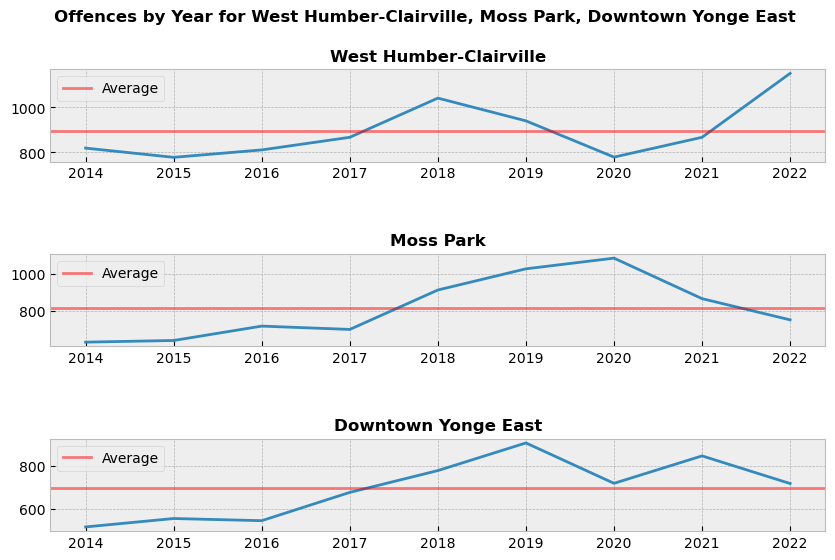

In [27]:
#Define function to get offences by year for top 3 neighbourhoods
def offences_by_year(df1, df2, df3, hood1, hood2, hood3, hood_names):
    fig, ax = plt.subplots(nrows = 3, ncols = 1)
    plt.rcParams['figure.figsize'] = (12, 6)
    plt.rcParams['figure.titleweight'] = 700
    titles_fontdict = {'weight': 700, 'size': 12}

    #First neighbourhood
    #Group by year and get count of offences
    hood1_year = df1.groupby('OCC_YEAR', as_index = False)['MCI_CATEGORY'].count()
    #Create first plot ax[0]
    year1 = ax[0].plot(hood1_year['OCC_YEAR'], hood1_year['MCI_CATEGORY'])
    #Insert a horizontal line representing the average count of offences across all years for that neighbourhood
    ax[0].axhline(y = hood1_year['MCI_CATEGORY'].mean(), color = 'r', alpha = 0.5, label = 'Average')
    #Set plot title, axis labels and legend
    ax[0].set_title(f'{hood1}', fontdict = titles_fontdict)
    ax[0].legend(loc = 'upper left')

    #Second neighbourhood
    #Group by year and get count of offences
    hood2_year = df2.groupby('OCC_YEAR', as_index = False)['MCI_CATEGORY'].count()
    #Create first plot ax[0]
    year2 = ax[1].plot(hood2_year['OCC_YEAR'], hood2_year['MCI_CATEGORY'])
    #Insert a horizontal line representing the average count of offences across all years for that neighbourhood
    ax[1].axhline(y = hood2_year['MCI_CATEGORY'].mean(), color = 'r', alpha = 0.5, label = 'Average')
    #Set plot title, axis labels and legend
    ax[1].set_title(f'{hood2}', fontdict = titles_fontdict)
    ax[1].legend(loc = 'upper left')

    #Third neighbourhood
    #Group by year and get count of offences
    hood3_year = df3.groupby('OCC_YEAR', as_index = False)['MCI_CATEGORY'].count()
    #Create first plot ax[0]
    year3 = ax[2].plot(hood3_year['OCC_YEAR'], hood3_year['MCI_CATEGORY'])
    #Insert a horizontal line representing the average count of offences across all years for that neighbourhood
    ax[2].axhline(y = hood3_year['MCI_CATEGORY'].mean(), color = 'r', alpha = 0.5, label = 'Average')
    #Set plot title, axis labels and legend
    ax[2].set_title(f'{hood3}', fontdict = titles_fontdict)
    ax[2].legend(loc = 'upper left')

    #Set figure title
    fig.suptitle(f"Offences by Year for {', '.join(hood_names)}")

    #Adjust space between subplots for readability, save figure and show 
    plt.subplots_adjust(hspace = 1)
    plt.savefig(f"../../Project 1 Output/{', '.join(hood_names)}_plots.png")
    plt.show()

#Call function for top 3 neighbourhoods
offences_by_year(whc_hood, mp_hood, dye_hood, 'West Humber-Clairville', 'Moss Park', 'Downtown Yonge East', top_3_names)
    

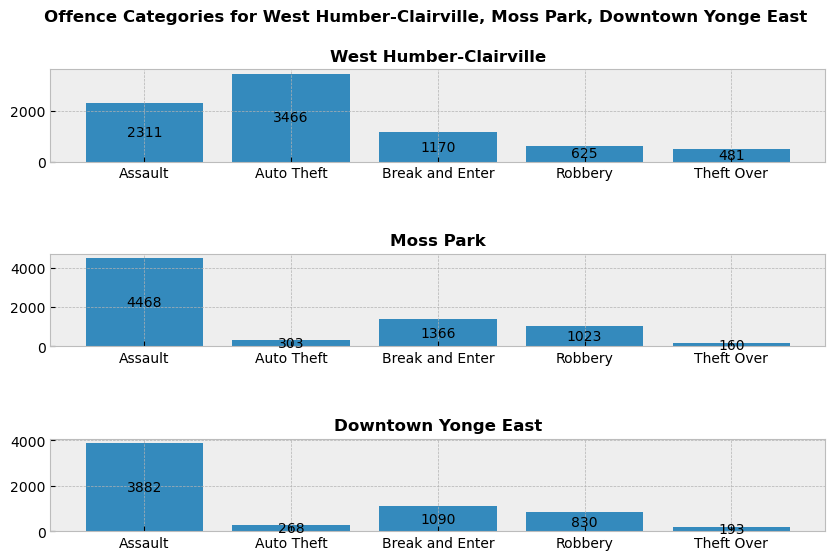

In [26]:
#Define function for offence categories
def offence_categories(df1, df2, df3, hood1, hood2, hood3, hood_names):
    fig, ax = plt.subplots(nrows = 3, ncols = 1)
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['figure.titleweight'] = 700
    titles_fontdict = {'weight': 700, 'size': 12}

    #First neighbourhood
    #Group by MCI category and get count of offences
    hood1_category = df1.groupby('MCI_CATEGORY')['EVENT_UNIQUE_ID'].count()
    #Create first plot ax[0], set title and axis labels and set bar labels to show counts on the plot
    category1 = ax[0].bar(hood1_category.index, hood1_category.values)
    ax[0].set_title(f'{hood1}', fontdict = titles_fontdict)
    ax[0].bar_label(category1, label_type = 'center')

    #Second neighbourhood
    #Group by MCI category and get count of offences
    hood2_category = df2.groupby('MCI_CATEGORY')['EVENT_UNIQUE_ID'].count()
    #Create first plot ax[0], set title and axis labels and set bar labels to show counts on the plot
    category2 = ax[1].bar(hood2_category.index, hood2_category.values)
    ax[1].set_title(f'{hood2}', fontdict = titles_fontdict)
    ax[1].bar_label(category2, label_type = 'center')

    #Third neighbourhood
    #Group by MCI category and get count of offences
    hood3_category = df3.groupby('MCI_CATEGORY')['EVENT_UNIQUE_ID'].count()
    #Create first plot ax[0], set title and axis labels and set bar labels to show counts on the plot
    category3 = ax[2].bar(hood3_category.index, hood3_category.values)
    ax[2].set_title(f'{hood3}', fontdict = titles_fontdict)
    ax[2].bar_label(category3, label_type = 'center')

    #Set figure title
    fig.suptitle(f"Offence Categories for {', '.join(hood_names)}")

    #Adjust space between subplots for readability, save figure and show 
    plt.subplots_adjust(hspace = 1)
    plt.savefig(f"../../Project 1 Output/{', '.join(hood_names)}_categories.png")
    plt.show()

#Call function for top 3 neighbourhoods
offence_categories(whc_hood, mp_hood, dye_hood, 'West Humber-Clairville', 'Moss Park', 'Downtown Yonge East', top_3_names)


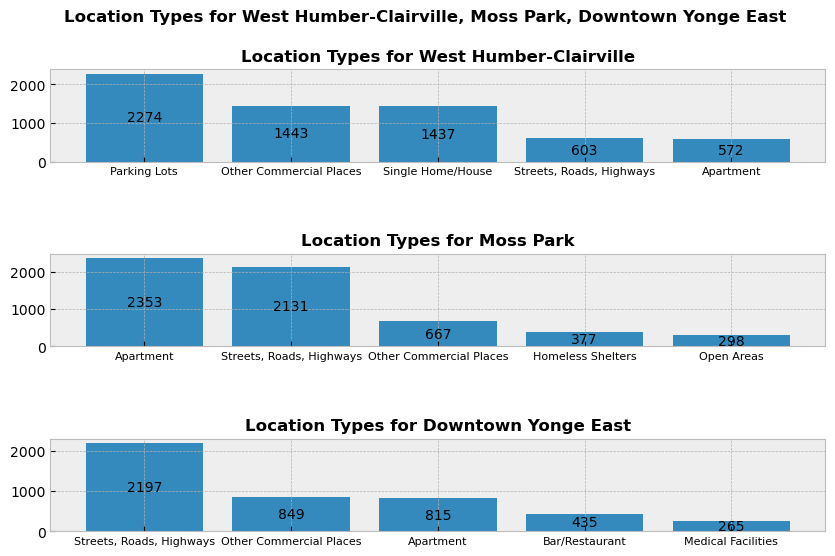

In [113]:
#Define function for offences by location types
def location_types(df1, df2, df3, hood1, hood2, hood3, hood_names):
    fig, ax = plt.subplots(nrows = 3, ncols = 1)
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['figure.titleweight'] = 700
    titles_fontdict = {'weight': 700, 'size': 12}

    #First neighbourhood
    #Group by location type and get count of offences
    hood1_location = df1.groupby('LOCATION_TYPE')['EVENT_UNIQUE_ID'].count()
    #Rename location types for readability and sort by descending values
    hood1_location = hood1_location.rename(renamed_locations).sort_values(ascending = False)
    #Get only the top 5 location types
    hood1_location = hood1_location.head(5)
    #Create plot ax[0], set title and set bar labels to show counts on the plot
    locations1 = ax[0].bar(hood1_location.index, hood1_location.values)
    ax[0].set_title(f'Location Types for {hood1}', fontdict = titles_fontdict)
    ax[0].tick_params(axis = 'x', labelsize = 8)
    ax[0].bar_label(locations1, label_type = 'center')

    #Second neighbourhood
    #Group by location type and get count of offences
    hood2_location = df2.groupby('LOCATION_TYPE')['EVENT_UNIQUE_ID'].count()
    #Rename location types for readability and sort by descending values
    hood2_location = hood2_location.rename(renamed_locations).sort_values(ascending = False)
    #Get only the top 5 location types
    hood2_location = hood2_location.head(5)
    #Create plot ax[1], set title and set bar labels to show counts on the plot
    locations2 = ax[1].bar(hood2_location.index, hood2_location.values)
    ax[1].set_title(f'Location Types for {hood2}', fontdict = titles_fontdict)
    ax[1].tick_params(axis = 'x', labelsize = 8)
    ax[1].bar_label(locations2, label_type = 'center')

    #Third neighbourhood
    #Group by location type and get count of offences
    hood3_location = df3.groupby('LOCATION_TYPE')['EVENT_UNIQUE_ID'].count()
    #Rename location types for readability and sort by descending values
    hood3_location = hood3_location.rename(renamed_locations).sort_values(ascending = False)
    #Get only the top 5 location types
    hood3_location = hood3_location.head(5)
    #Create plot ax[2], set title and set bar labels to show counts on the plot
    locations3 = ax[2].bar(hood3_location.index, hood3_location.values)
    ax[2].set_title(f'Location Types for {hood3}', fontdict = titles_fontdict)
    ax[2].tick_params(axis = 'x', labelsize = 8)
    ax[2].bar_label(locations3, label_type = 'center')

    #Set figure title
    fig.suptitle(f"Location Types for {', '.join(hood_names)}")

    #Adjust space between subplots for readability, save figure and show 
    plt.subplots_adjust(hspace = 1)
    plt.savefig(f"../../Project 1 Output/{', '.join(hood_names)}_locations.png")
    plt.show()

#Call function for top 3 neighbourhoods
location_types(whc_hood, mp_hood, dye_hood, 'West Humber-Clairville', 'Moss Park', 'Downtown Yonge East', top_3_names)


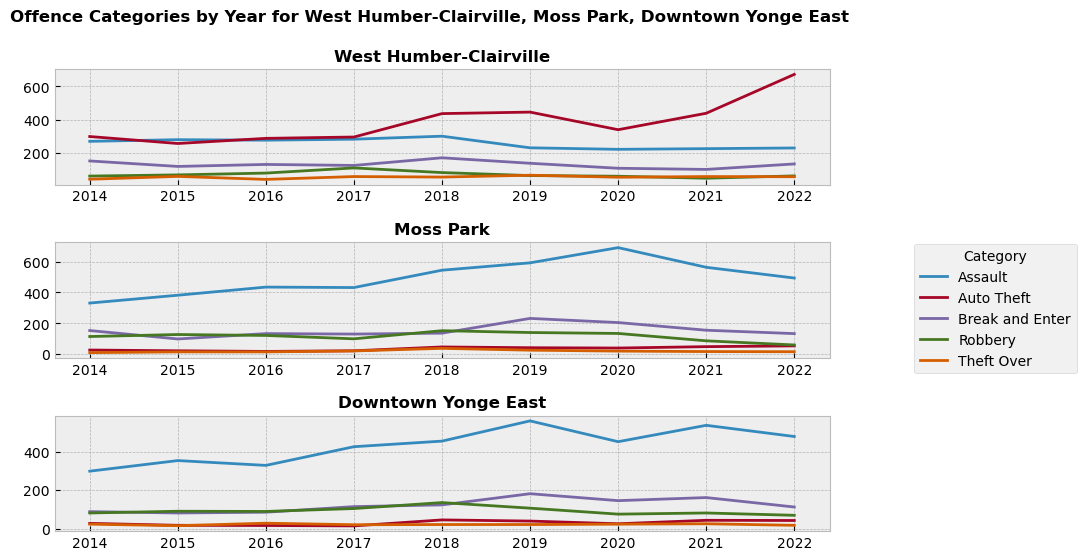

In [30]:
#Define function to get line plots of offence categories by year for neighbourhoods
def categories_by_year(df1, df2, df3, hood1, hood2, hood3, hood_names):
    fig, ax = plt.subplots(nrows = 3, ncols = 1)
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['figure.titleweight'] = 700
    titles_fontdict = {'weight': 700, 'size': 12}

    #First neighbourhood
    #For each MCI category, isolate rows from neighbourhood dataframe that correspond with the category and group by year to get the count
    hood1_assault = df1.loc[df1['MCI_CATEGORY'] == 'Assault'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood1_auto_theft = df1.loc[df1['MCI_CATEGORY'] == 'Auto Theft'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood1_break_enter = df1.loc[df1['MCI_CATEGORY'] == 'Break and Enter'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood1_robbery = df1.loc[df1['MCI_CATEGORY'] == 'Robbery'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood1_theft_over = df1.loc[df1['MCI_CATEGORY'] == 'Theft Over'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    #Create 5 line plots for each MCI category on the same plot
    ax[0].plot(hood1_assault.index, hood1_assault.values, label = 'Assault')
    ax[0].plot(hood1_auto_theft.index, hood1_auto_theft.values, label = 'Auto Theft')
    ax[0].plot(hood1_break_enter.index, hood1_break_enter.values, label = 'Break and Enter')
    ax[0].plot(hood1_robbery.index, hood1_robbery.values, label = 'Robbery')
    ax[0].plot(hood1_theft_over.index, hood1_theft_over.values, label = 'Theft Over')
    #Set title and legend
    ax[0].set_title(f'{hood1}', fontdict = titles_fontdict)
    #ax[0].legend(bbox_to_anchor=(1.1, 1.05))

    #Second neighbourhood
    #For each MCI category, isolate rows from neighbourhood dataframe that correspond with the category and group by year to get the count
    hood2_assault = df2.loc[df2['MCI_CATEGORY'] == 'Assault'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood2_auto_theft = df2.loc[df2['MCI_CATEGORY'] == 'Auto Theft'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood2_break_enter = df2.loc[df2['MCI_CATEGORY'] == 'Break and Enter'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood2_robbery = df2.loc[df2['MCI_CATEGORY'] == 'Robbery'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood2_theft_over = df2.loc[df2['MCI_CATEGORY'] == 'Theft Over'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    #Create 5 line plots for each MCI category on the same plot
    ax[1].plot(hood2_assault.index, hood2_assault.values, label = 'Assault')
    ax[1].plot(hood2_auto_theft.index, hood2_auto_theft.values, label = 'Auto Theft')
    ax[1].plot(hood2_break_enter.index, hood2_break_enter.values, label = 'Break and Enter')
    ax[1].plot(hood2_robbery.index, hood2_robbery.values, label = 'Robbery')
    ax[1].plot(hood2_theft_over.index, hood2_theft_over.values, label = 'Theft Over')
    #Set title and legend
    ax[1].set_title(f'{hood2}', fontdict = titles_fontdict)
    ax[1].legend(bbox_to_anchor=(1.1, 1.05), title = 'Category')

    #Third neighbourhood
    #For each MCI category, isolate rows from neighbourhood dataframe that correspond with the category and group by year to get the count
    hood3_assault = df3.loc[df3['MCI_CATEGORY'] == 'Assault'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood3_auto_theft = df3.loc[df3['MCI_CATEGORY'] == 'Auto Theft'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood3_break_enter = df3.loc[df3['MCI_CATEGORY'] == 'Break and Enter'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood3_robbery = df3.loc[df3['MCI_CATEGORY'] == 'Robbery'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood3_theft_over = df3.loc[df3['MCI_CATEGORY'] == 'Theft Over'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    #Create 5 line plots for each MCI category on the same plot
    ax[2].plot(hood3_assault.index, hood3_assault.values, label = 'Assault')
    ax[2].plot(hood3_auto_theft.index, hood3_auto_theft.values, label = 'Auto Theft')
    ax[2].plot(hood3_break_enter.index, hood3_break_enter.values, label = 'Break and Enter')
    ax[2].plot(hood3_robbery.index, hood3_robbery.values, label = 'Robbery')
    ax[2].plot(hood3_theft_over.index, hood3_theft_over.values, label = 'Theft Over')
    #Set title and legend
    ax[2].set_title(f'{hood3}', fontdict = titles_fontdict)
    #ax[2].legend(bbox_to_anchor=(1.1, 1.05))

    #Set figure title
    fig.suptitle(f"Offence Categories by Year for {', '.join(hood_names)}")

    #Adjust space between subplots for readability
    plt.subplots_adjust(hspace = 0.5)
    plt.savefig(f"../../Project 1 Output/{', '.join(hood_names)}_categories.png")
    plt.show()

#Call function for top 3 neighbourhoods
categories_by_year(whc_hood, mp_hood, dye_hood, 'West Humber-Clairville', 'Moss Park', 'Downtown Yonge East', top_3_names)


## Bottom 3 Neighbourhoods
### Woodbine-Lumsden, Guildwood & Lambton Baby Point

In [31]:
#Create 3 new dataframes from mci_2014_onwards for each of the bottom 3 neighbourhoods 
wl_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Woodbine-Lumsden']
gw_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Guildwood']
lbp_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Lambton Baby Point']

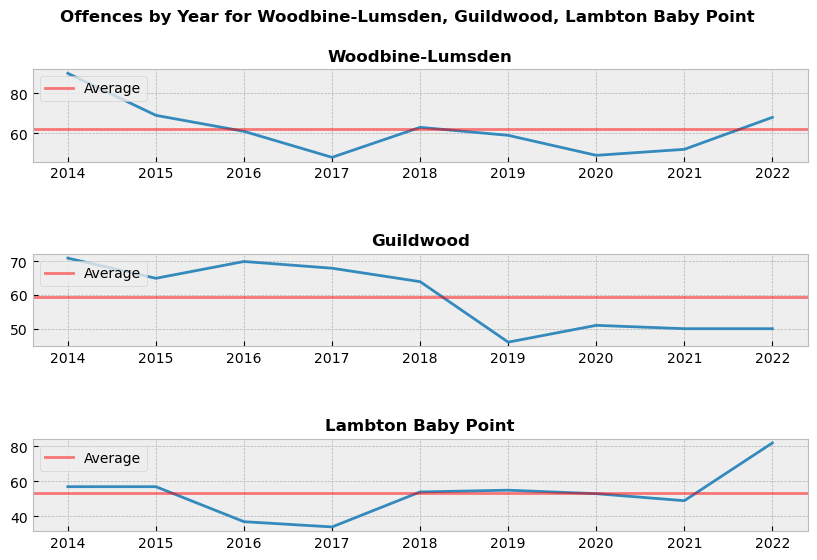

In [32]:
#Call offences_by_year function for bottom 3 neighbourhoods
offences_by_year(wl_hood, gw_hood, lbp_hood, 'Woodbine-Lumsden', 'Guildwood', 'Lambton Baby Point', bottom_3_names)

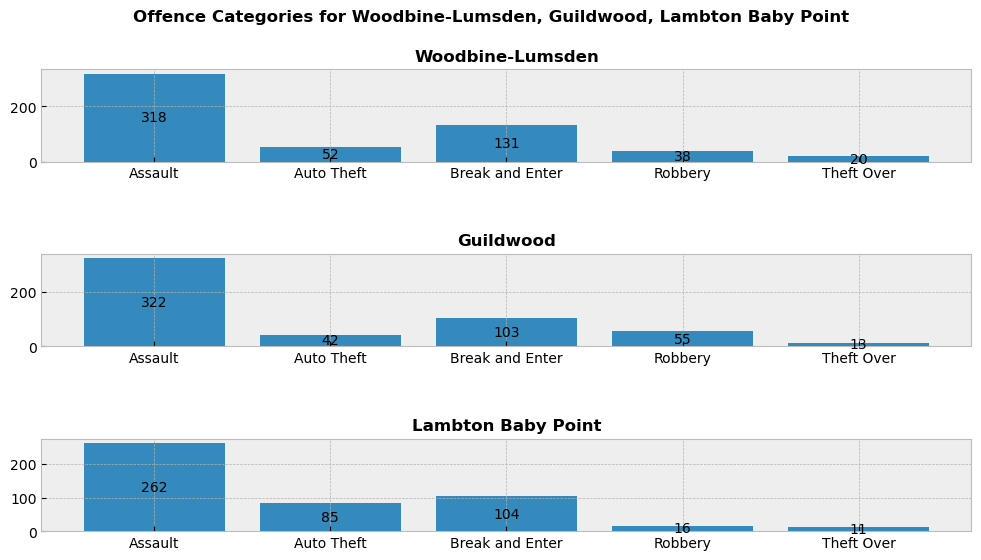

In [33]:
#Call offence_categories function
offence_categories(wl_hood, gw_hood, lbp_hood, 'Woodbine-Lumsden', 'Guildwood', 'Lambton Baby Point', bottom_3_names)

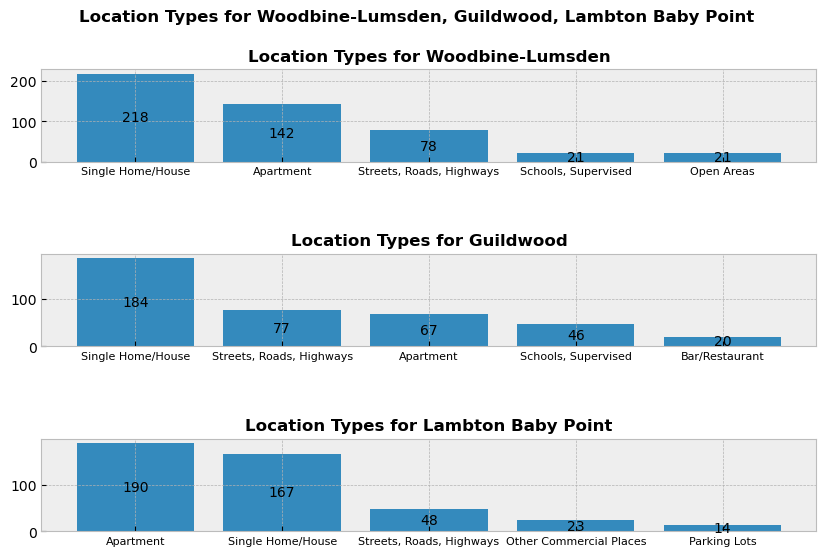

In [114]:
#Call location_types function for bottom 3 neighbourhoods
location_types(wl_hood, gw_hood, lbp_hood, 'Woodbine-Lumsden', 'Guildwood', 'Lambton Baby Point', bottom_3_names)

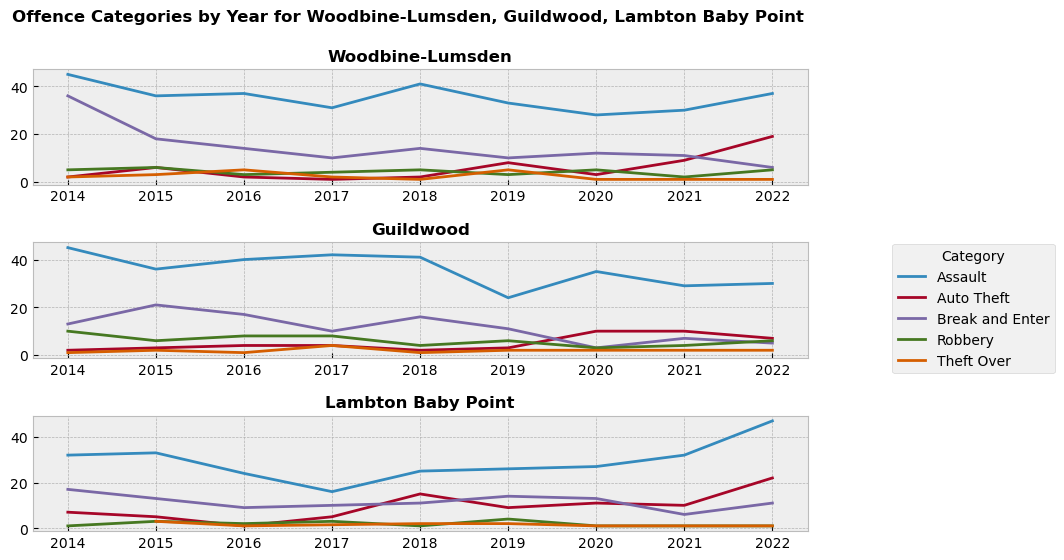

In [35]:
#Call categories_by_year function for bottom 3 neighbourhoods
categories_by_year(wl_hood, gw_hood, lbp_hood, 'Woodbine-Lumsden', 'Guildwood', 'Lambton Baby Point', bottom_3_names)

## 3 Random Neighbourhoods
### East L'Amoreaux, Oakridge & Keelesdale-Eglinton West

In [36]:
#Create new dataframe from mci_2014_onwards for random 3 neighbourhoods
ela_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == "East L'Amoreaux"]
or_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Oakridge']
kew_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Keelesdale-Eglinton West']

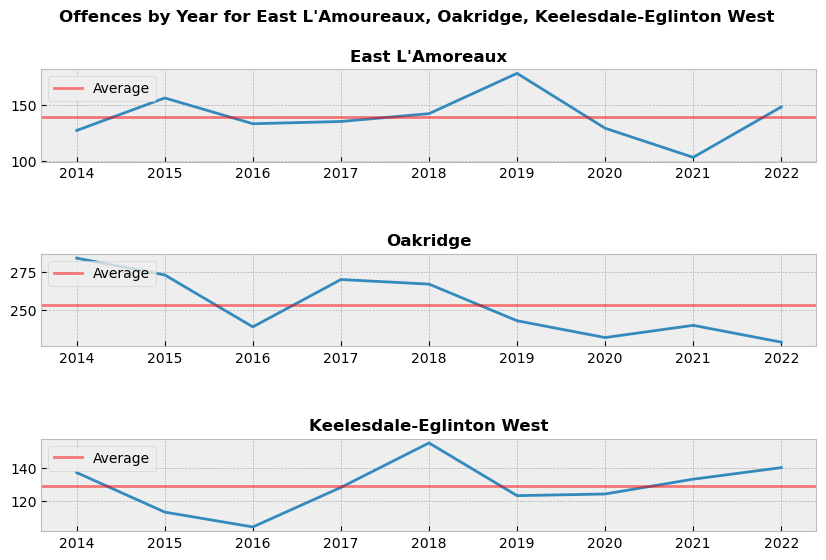

In [37]:
#Call offences_by_year function for bottom 3 neighbourhoods
offences_by_year(ela_hood, or_hood, kew_hood, "East L'Amoreaux", "Oakridge", "Keelesdale-Eglinton West", random_3_names)

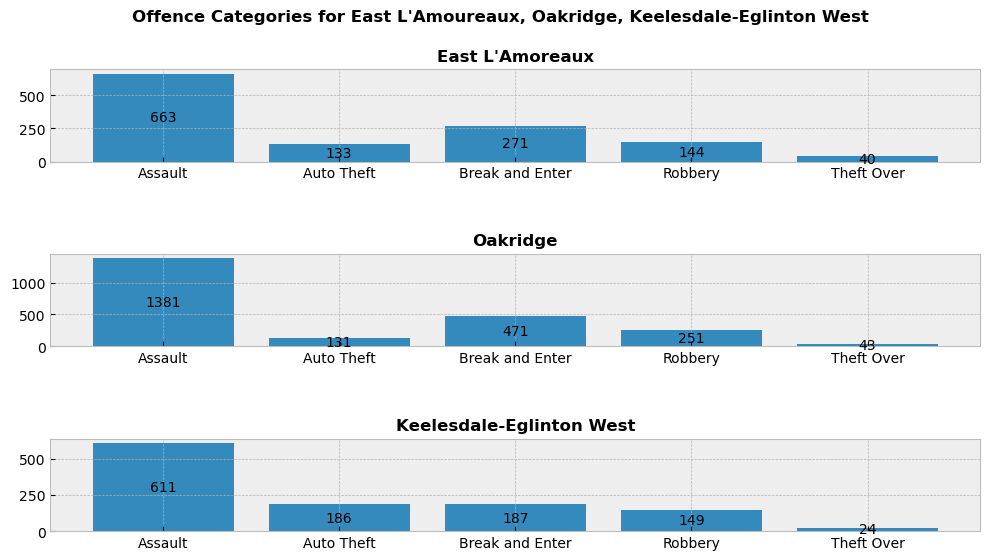

In [38]:
#Call offence_categories function
offence_categories(ela_hood, or_hood, kew_hood, "East L'Amoreaux", "Oakridge", "Keelesdale-Eglinton West", random_3_names)

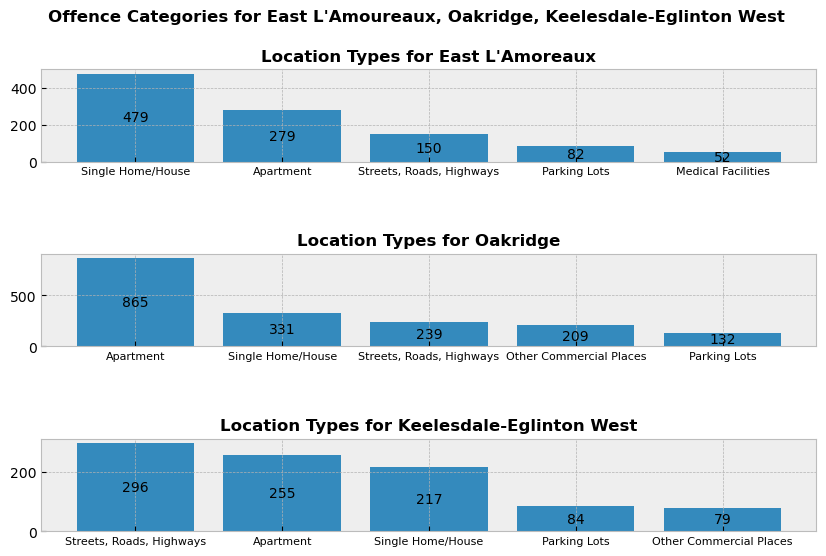

In [39]:
#Call location_types function
location_types(ela_hood, or_hood, kew_hood, "East L'Amoreaux", "Oakridge", "Keelesdale-Eglinton West", random_3_names)

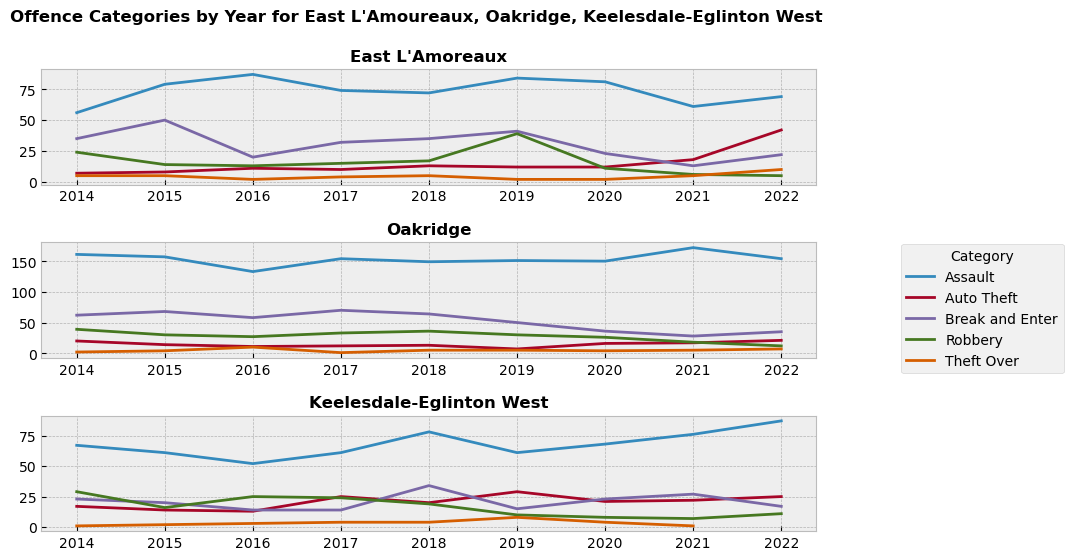

In [40]:
#Call categories_by_year function
categories_by_year(ela_hood, or_hood, kew_hood, "East L'Amoreaux", "Oakridge", "Keelesdale-Eglinton West", random_3_names)

## All Neighbourhoods
### Plot total offences by year and overall offence categories for top 3 and bottom 3 neighbourhoods on same plots

In [105]:
#Extract neighbourhood names from top_3_hoods and bottom_3_hoods and save them in a list
top3_hoods_list = list(top_3_hoods['NEIGHBOURHOOD_158'])
bottom3_hoods_list = list(bottom_3_hoods['NEIGHBOURHOOD_158'])

In [108]:
#Reduce columns in original dataframe
reduced_mci_2014_onwards = mci_2014_onwards[['EVENT_UNIQUE_ID', 'OCC_YEAR', 'OCC_MONTH', 'LOCATION_TYPE', 'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158']]
reduced_mci_2014_onwards.head()

,EVENT_UNIQUE_ID,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
0,GO-20141260701,2014,January,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",B&E,Break and Enter,70,South Riverdale
1,GO-20141260889,2014,January,"Apartment (Rooming House, Condo)",Assault,Assault,74,North St.James Town
2,GO-20141260973,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Theft Over,Theft Over,NSA,NSA
3,GO-20141261050,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Assault,Assault,69,Blake-Jones
4,GO-20141259344,2014,January,Bar / Restaurant,Assault Bodily Harm,Assault,164,Wellington Place


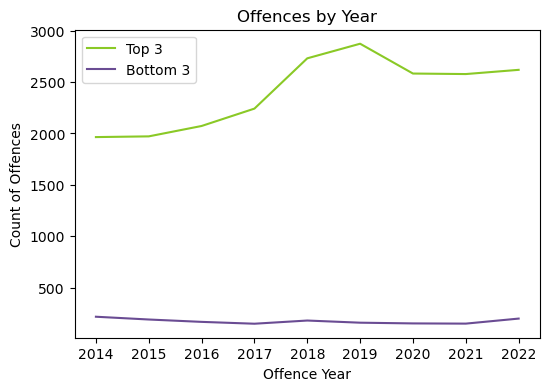

In [44]:
#Reduce to top 3 neighbourhoods
top_3_df = reduced_mci_2014_onwards.loc[(reduced_mci_2014_onwards['NEIGHBOURHOOD_158'] == 'West Humber-Clairville') | 
                                        (reduced_mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Moss Park') |
                                        (reduced_mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Downtown Yonge East')]
#Group by year
top_3_year = top_3_df.groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].size()

#Reduce to bottom 3 neighbourhoods
bottom_3_df = reduced_mci_2014_onwards.loc[(reduced_mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Woodbine-Lumsden') | 
                                        (reduced_mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Guildwood') |
                                        (reduced_mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Lambton Baby Point')]
#Group by year
bottom_3_year = bottom_3_df.groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].size()

#Plot total offences by year for the top 3 neighbourhoods combined and the bottom 3 neighbourhoods combined in one figure
plt.figure(figsize = (6, 4))
top_3_year.plot(kind = 'line', color = ['#8AC926'], label = 'Top 3')
bottom_3_year.plot(kind = 'line', color = ['#6A4C93'], label = 'Bottom 3')
plt.title('Offences by Year')
plt.ylabel('Count of Offences')
plt.xlabel('Offence Year')
plt.legend(loc = 'best')
plt.savefig('../../Project 1 Output/top_bottom_year.png')
plt.show()


In [106]:
#Group mci_2014_onwards by neighbourhood and year, then get the count of MCI categories
neighbourhood_offences = mci_2014_onwards.groupby(['NEIGHBOURHOOD_158', 'OCC_YEAR'], as_index = False)['MCI_CATEGORY'].count()
neighbourhood_offences = neighbourhood_offences.rename(columns = {'NEIGHBOURHOOD_158': 'Neighbourhood', 'OCC_YEAR': 'Occupation Year', 'MCI_CATEGORY': 'Offences'})

In [98]:
#Add a new column to neighbourhood_offences to calculate the year-over-year change in offences using .pct_change()
neighbourhood_offences['YoY % Change'] = (round(neighbourhood_offences['Offences'].pct_change() * 100, 2))
#Change the values for 2014 to 0 as this dataset begins in 2014
neighbourhood_offences.loc[neighbourhood_offences['Occupation Year'] == 2014, 'YoY % Change'] = 0
neighbourhood_offences

,Neighbourhood,Occupation Year,Offences,YoY % Change
0,Agincourt North,2014,170,0.00
1,Agincourt North,2015,183,7.65
2,Agincourt North,2016,157,-14.21
3,Agincourt North,2017,175,11.46
4,Agincourt North,2018,226,29.14
...,...,...,...,...
1426,Yorkdale-Glen Park,2018,324,8.36
1427,Yorkdale-Glen Park,2019,400,23.46
1428,Yorkdale-Glen Park,2020,342,-14.50
1429,Yorkdale-Glen Park,2021,316,-7.60


In [102]:
#Sort neighbourhood_offences by YoY % Change in descending order to get neighbourhoods with greatest YoY change
descending_neighbourhood_offences = neighbourhood_offences.sort_values(by = 'YoY % Change', ascending = False)
highest_neighbourhood_offences = descending_neighbourhood_offences.head(3)
highest_neighbourhood_offences

,Neighbourhood,Occupation Year,Offences,YoY % Change
462,Forest Hill South,2017,107,94.55
26,Alderwood,2022,148,89.74
453,Forest Hill North,2017,106,89.29


In [103]:
#Sort neighbourhood_offences by YoY % Change in ascending order to get neighbourhoods with least YoY change
ascending_neighbourhood_offences = neighbourhood_offences.sort_values(by = 'YoY % Change')
lowest_neighbourhood_offences = ascending_neighbourhood_offences.head(3)
lowest_neighbourhood_offences

,Neighbourhood,Occupation Year,Offences,YoY % Change
555,Highland Creek,2020,59,-52.80
793,Markland Wood,2015,48,-47.25
786,Maple Leaf,2017,40,-45.95


In [104]:
#Store highest and lowest neighbourhood names as lists in variables to be used later for plots
high_occ_hoods = list(highest_neighbourhood_offences['Neighbourhood'])
low_occ_hoods = list(lowest_neighbourhood_offences['Neighbourhood'])

In [109]:
#Separate highest neighbourhoods in their own dataframes
fhs_hood = reduced_mci_2014_onwards.loc[reduced_mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Forest Hill South']
aw_hood = reduced_mci_2014_onwards.loc[reduced_mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Alderwood']
fhn_hood = reduced_mci_2014_onwards.loc[reduced_mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Forest Hill North']

In [120]:
#Define function to generate 2 plots for one neighbourhood in the same figure
def neighbourhood_plots(df, hood):
    fig, ax = plt.subplots(nrows = 2, ncols = 1)
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['figure.titleweight'] = 700
    titles_fontdict = {'weight': 700, 'size': 12}

    #First plot: Offences by year
    #Group by year and get count of offences
    hood_year = df.groupby('OCC_YEAR', as_index = False)['MCI_CATEGORY'].count()
    #Create the first plot ax[0]
    year1 = ax[0].plot(hood_year['OCC_YEAR'], hood_year['MCI_CATEGORY'])
    #Insert a horizontal line representing the average count of offences across all years for that neighbourhood
    ax[0].axhline(y = hood_year['MCI_CATEGORY'].mean(), color = 'r', alpha = 0.5, label = 'Average')
    #Set plot title, axis labels and legend
    ax[0].set_title(f'Offences by Year for {hood}', fontdict = titles_fontdict)
    ax[0].legend(loc = 'upper left')

    #Second plot: MCI categories by year
    #For each MCI category, isolate rows from neighbourhood dataframe that correspond with the category and group by year to get the count
    hood_assault = df.loc[df['MCI_CATEGORY'] == 'Assault'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood_auto_theft = df.loc[df['MCI_CATEGORY'] == 'Auto Theft'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood_break_enter = df.loc[df['MCI_CATEGORY'] == 'Break and Enter'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood_robbery = df.loc[df['MCI_CATEGORY'] == 'Robbery'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood_theft_over = df.loc[df['MCI_CATEGORY'] == 'Theft Over'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    #Create 5 line plots for each MCI category on the same plot
    ax[1].plot(hood_assault.index, hood_assault.values, label = 'Assault')
    ax[1].plot(hood_auto_theft.index, hood_auto_theft.values, label = 'Auto Theft')
    ax[1].plot(hood_break_enter.index, hood_break_enter.values, label = 'Break and Enter')
    ax[1].plot(hood_robbery.index, hood_robbery.values, label = 'Robbery')
    ax[1].plot(hood_theft_over.index, hood_theft_over.values, label = 'Theft Over')
    #Set title and legend
    ax[1].set_title(f'Categories by Year for {hood}', fontdict = titles_fontdict)
    ax[1].legend(bbox_to_anchor=(1.05, 1.05), title = 'Category')

    #Set figure title
    fig.suptitle(f"{hood}")

    #Adjust space between subplots for readability, save figure and show 
    plt.subplots_adjust(hspace = 0.5)
    plt.savefig(f"../../Project 1 Output/{hood}.png")
    plt.show()

In [126]:
#Compare total offence and offence categories in the 2 years for each neighbourhood (e.g. Forest Hill South had a 94% YoY increase in 2017, so compare with 2016)
#Separate fhs_hood in 2 dataframes: one for the year prior to the change, one for the year of
fhs_2016 = fhs_hood.loc[fhs_hood['OCC_YEAR'] == 2016]
fhs_2017 = fhs_hood.loc[fhs_hood['OCC_YEAR'] == 2017]

In [130]:
#Use pd.Categorical to order months in chronological order
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
fhs_2016['OCC_MONTH'] = pd.Categorical(fhs_2016['OCC_MONTH'], categories = months, ordered = True)
fhs_2017['OCC_MONTH'] = pd.Categorical(fhs_2017['OCC_MONTH'], categories = months, ordered = True)

/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_76897/3233625989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhs_2016['OCC_MONTH'] = pd.Categorical(fhs_2016['OCC_MONTH'], categories = months, ordered = True)
/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_76897/3233625989.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhs_2017['OCC_MONTH'] = pd.Categorical(fhs_2017['OCC_MONTH'], categories = months, ordered = True)


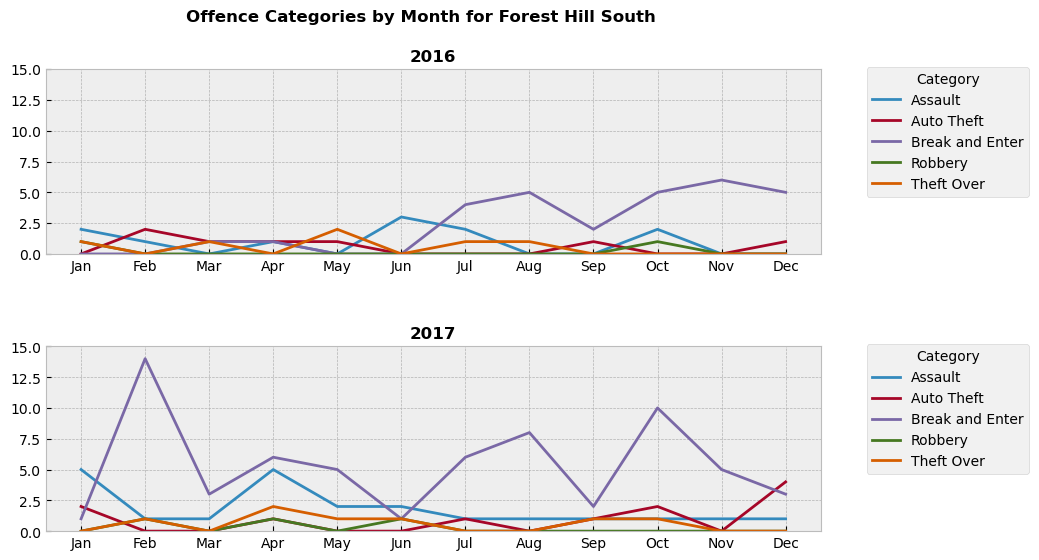

In [139]:
#Plot offence categories by month for Forest Hill South in 2016 and 2017 on the same figure
fig, ax = plt.subplots(nrows = 2, ncols = 1)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.titleweight'] = 700
titles_fontdict = {'weight': 700, 'size': 12}

#First plot: 2016
#For each MCI category, isolate rows from neighbourhood dataframe that correspond with the category and group by month to get the count
whs_2016_assault = fhs_2016.loc[fhs_2016['MCI_CATEGORY'] == 'Assault'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
whs_2016_auto_theft = fhs_2016.loc[fhs_2016['MCI_CATEGORY'] == 'Auto Theft'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
whs_2016_break_enter = fhs_2016.loc[fhs_2016['MCI_CATEGORY'] == 'Break and Enter'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
whs_2016_robbery = fhs_2016.loc[fhs_2016['MCI_CATEGORY'] == 'Robbery'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
whs_2016_theft_over = fhs_2016.loc[fhs_2016['MCI_CATEGORY'] == 'Theft Over'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
#Create 5 line plots for each MCI category on the same plot
ax[0].plot(whs_2016_assault.index, whs_2016_assault.values, label = 'Assault')
ax[0].plot(whs_2016_auto_theft.index, whs_2016_auto_theft.values, label = 'Auto Theft')
ax[0].plot(whs_2016_break_enter.index, whs_2016_break_enter.values, label = 'Break and Enter')
ax[0].plot(whs_2016_robbery.index, whs_2016_robbery.values, label = 'Robbery')
ax[0].plot(whs_2016_theft_over.index, whs_2016_theft_over.values, label = 'Theft Over')
#Set ylim to 15 to match the scale of the y axis for ax[1]
ax[0].set_ylim(0, 15)
#Set x ticks rotation
ax[0].set_xticks(ticks=np.arange(12), labels=[m[0:3] for m in whs_2016_assault.index])
#Set title and legend
ax[0].set_title('2016', fontdict = titles_fontdict)
ax[0].legend(bbox_to_anchor=(1.05, 1.05), title = 'Category')

#Second plot: 2017
#For each MCI category, isolate rows from neighbourhood dataframe that correspond with the category and group by year to get the count
whs_2017_assault = fhs_2017.loc[fhs_2017['MCI_CATEGORY'] == 'Assault'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
whs_2017_auto_theft = fhs_2017.loc[fhs_2017['MCI_CATEGORY'] == 'Auto Theft'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
whs_2017_break_enter = fhs_2017.loc[fhs_2017['MCI_CATEGORY'] == 'Break and Enter'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
whs_2017_robbery = fhs_2017.loc[fhs_2017['MCI_CATEGORY'] == 'Robbery'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
whs_2017_theft_over = fhs_2017.loc[fhs_2017['MCI_CATEGORY'] == 'Theft Over'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
#Create 5 line plots for each MCI category on the same plot
ax[1].plot(whs_2017_assault.index, whs_2017_assault.values, label = 'Assault')
ax[1].plot(whs_2017_auto_theft.index, whs_2017_auto_theft.values, label = 'Auto Theft')
ax[1].plot(whs_2017_break_enter.index, whs_2017_break_enter.values, label = 'Break and Enter')
ax[1].plot(whs_2017_robbery.index, whs_2017_robbery.values, label = 'Robbery')
ax[1].plot(whs_2017_theft_over.index, whs_2017_theft_over.values, label = 'Theft Over')
#Set y limit
ax[1].set_ylim(0, 15)
#Set x ticks rotation
plt.xticks(ticks=np.arange(12), labels=[m[0:3] for m in whs_2017_assault.index])
#Set title and legend
ax[1].set_title('2017', fontdict = titles_fontdict)
ax[1].legend(bbox_to_anchor=(1.05, 1.05), title = 'Category')

#Set figure title
fig.suptitle("Offence Categories by Month for Forest Hill South")

#Adjust space between subplots for readability, save figure and show 
plt.subplots_adjust(hspace = 0.5)
plt.show()
